In [1]:
# pip install pandas seaborn gradio ollama 

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

url = r'/Users/varadpendkar/Downloads/Naresh all documents /3th- EDA Automation Mistral, gradio/titanic_ dataset_final.csv'
df = pd.read_csv(url)


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Missing value check 
print('\nMissing Value:\n',df.isnull().sum())


Missing Value:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Survival Plot')

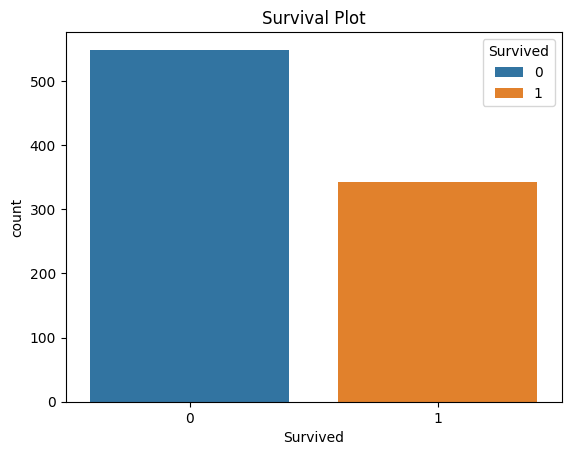

In [13]:
# survival rate visusalization 
sns.countplot(x='Survived',data=df,hue='Survived')
plt.title('Survival Plot')

In [21]:
import ollama 

def generate_insights(df_summary):
  prompt = f'Analyze the dataset summary and provide insights in points and it should be concise:\n\n{df_summary}'
  response =ollama.chat(model="mistral",messages= [{"role":"user","content":prompt}])
  return response['message']['content']

# Generate AI Insights
summary =df.describe().to_string()
insights =generate_insights(summary)
print('\n AI_Generated Insights :\n',insights)


 AI_Generated Insights :
  1. The dataset consists of 891 records with no missing values in any column.
2. The mean age is approximately 29.7 years, with a standard deviation of 14.5 years, indicating a wide age range among passengers.
3. Majority of the passengers (mean Survived = 0.38) did not survive the Titanic disaster.
4. The average Pclass is around 2.3, suggesting most passengers were from second or third class.
5. The average number of siblings and parents aboard was approximately 0.52 and 0.38 respectively, indicating a relatively low dependency ratio among passengers.
6. The average fare is $32.20, with a standard deviation of $49.70, suggesting significant variations in ticket prices.
7. The youngest passenger was just 0.42 years old, while the oldest was 80 years old.
8. Median values provide insights into the distribution: Half of the passengers were under 30 years (Age = 28), traveled in second or third class (Pclass = 3), had no siblings or parents aboard (SibSp = Parc

In [22]:
import gradio as gr
def eda_analysis(file):
  df = pd.read_csv(file.name)
  summary = df.describe().to_string()
  insights = generate_insights(summary)
  return insights 
#Create the interface
demo = gr.Interface(fn=eda_analysis,inputs = 'file',outputs='text',title = 'AI-Powered EDA with mistral')
# launch the App
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://9841c865b078f6a1d7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
